In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Load the dataset
df = pd.read_csv('/content/TSLA.csv')  # Ensure the dataset has 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
# 2. Preprocess the data (normalize)
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# 3. Create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# 4. Split the data into train and test sets
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

In [ ]:
# 5. Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer for predicting the stock price

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 6. Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 2.1311e-04 - val_loss: 0.0842
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.8844e-06 - val_loss: 0.0824
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.1295e-06 - val_loss: 0.0796
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1064e-06 - val_loss: 0.0771
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7084e-06 - val_loss: 0.0762
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5302e-06 - val_loss: 0.0751
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1986e-06 - val_loss: 0.0727
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.1781e-06 - val_loss: 0.0718
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8964e-06 - val_loss: 0.0719
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7362e-06 - val_loss: 0.0713


In [ ]:
# 7. Predict for the next 20 days
# Use the last 60 days from the training set to predict the next 20 days
predictions = []
input_sequence = scaled_data[split_index - sequence_length:split_index]

for _ in range(20):  # Predict for the next 20 days
    input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
    predicted_price = model.predict(input_sequence)

    predictions.append(predicted_price[0][0])  # Save predicted price

    # Reshape the predicted price to match input shape (1, 1, 1)
    predicted_price = np.reshape(predicted_price, (1, 1, 1))

    # Shift the input_sequence and append the predicted price
    input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
# 8. Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [ ]:
# 9. Compare with the actual prices
actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

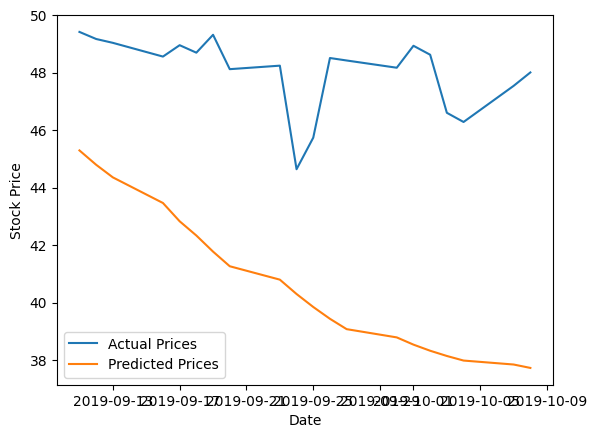

Day 1: Actual: 49.41999799999999, Predicted: 45.296321868896484
Day 2: Actual: 49.17400000000001, Predicted: 44.79721450805664
Day 3: Actual: 49.040001, Predicted: 44.35849380493164
Day 4: Actual: 48.562, Predicted: 43.46680450439453
Day 5: Actual: 48.958, Predicted: 42.83075714111328
Day 6: Actual: 48.698001999999995, Predicted: 42.335018157958984
Day 7: Actual: 49.32, Predicted: 41.7747802734375
Day 8: Actual: 48.124001, Predicted: 41.265865325927734
Day 9: Actual: 48.245998, Predicted: 40.79948806762695
Day 10: Actual: 44.641998, Predicted: 40.299983978271484
Day 11: Actual: 45.740002, Predicted: 39.84845733642578
Day 12: Actual: 48.512001, Predicted: 39.436973571777344
Day 13: Actual: 48.425999, Predicted: 39.07692337036133
Day 14: Actual: 48.17399999999999, Predicted: 38.790184020996094
Day 15: Actual: 48.938, Predicted: 38.53845977783203
Day 16: Actual: 48.625999, Predicted: 38.325687408447266
Day 17: Actual: 46.605999, Predicted: 38.14354705810547
Day 18: Actual: 46.285999, Pred

In [ ]:
# 10. Plot the results
plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print actual and predicted prices for the next 20 days
for i in range(20):
    print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Load the dataset
df = pd.read_csv('/content/TSLA.csv')  # Ensure the dataset has 'Date' and 'Close' columns
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [ ]:
# 2. Preprocess the data (normalize)
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
# 3. Create sequences for the RNN
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 120
X, y = create_sequences(scaled_data, sequence_length)

In [ ]:
# 4. Split the data into train and test sets
split_index = int(len(X) * 0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

In [ ]:
# 5. Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))  # Output layer for predicting the stock price

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 6. Train the model on the training set
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 3.6022e-05 - val_loss: 0.0047
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9284e-06 - val_loss: 0.0043
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4857e-06 - val_loss: 0.0044
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.6360e-06 - val_loss: 0.0047
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.7573e-06 - val_loss: 0.0056
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 1.6404e-06 - val_loss: 0.0057
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 1.3696e-06 - val_loss: 0.0057
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 1.6175e-06 - val_loss: 0.0066
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.8430e-06 - val_loss: 0.0074
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 1.5857e-06 - val_loss: 0.0076


In [ ]:
# 7. Predict for the next 20 days
# Use the last 60 days from the training set to predict the next 20 days
predictions = []
input_sequence = scaled_data[split_index - sequence_length:split_index]

for _ in range(20):  # Predict for the next 20 days
    input_sequence = np.reshape(input_sequence, (1, sequence_length, 1))  # Ensure correct shape for RNN
    predicted_price = model.predict(input_sequence)

    predictions.append(predicted_price[0][0])  # Save predicted price

    # Reshape the predicted price to match input shape (1, 1, 1)
    predicted_price = np.reshape(predicted_price, (1, 1, 1))

    # Shift the input_sequence and append the predicted price
    input_sequence = np.append(input_sequence[:, 1:, :], predicted_price, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
# 8. Inverse transform the predicted prices
predicted_prices = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [ ]:
# 9. Compare with the actual prices
actual_prices = scaler.inverse_transform(scaled_data[split_index:split_index+20])

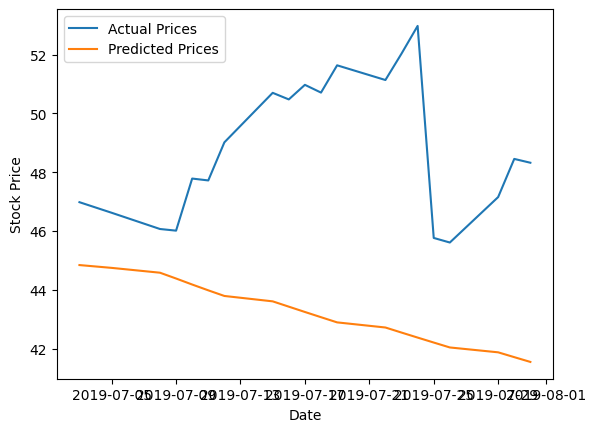

Day 1: Actual: 46.980000000000004, Predicted: 44.841251373291016
Day 2: Actual: 46.619999, Predicted: 44.745399475097656
Day 3: Actual: 46.068000999999995, Predicted: 44.581298828125
Day 4: Actual: 46.012001, Predicted: 44.38383865356445
Day 5: Actual: 47.784, Predicted: 44.179386138916016
Day 6: Actual: 47.720001, Predicted: 43.98162841796875
Day 7: Actual: 49.015999, Predicted: 43.790122985839844
Day 8: Actual: 50.700001, Predicted: 43.606834411621094
Day 9: Actual: 50.476002, Predicted: 43.42625045776367
Day 10: Actual: 50.972, Predicted: 43.245662689208984
Day 11: Actual: 50.708, Predicted: 43.06789779663086
Day 12: Actual: 51.636002, Predicted: 42.89156723022461
Day 13: Actual: 51.136002, Predicted: 42.7172737121582
Day 14: Actual: 52.034, Predicted: 42.5450325012207
Day 15: Actual: 52.976002, Predicted: 42.37451934814453
Day 16: Actual: 45.764, Predicted: 42.20572280883789
Day 17: Actual: 45.608002, Predicted: 42.038516998291016
Day 18: Actual: 47.153999, Predicted: 41.8729248046

In [ ]:
# 10. Plot the results
plt.plot(df.index[split_index:split_index+20], actual_prices, label='Actual Prices')
plt.plot(df.index[split_index:split_index+20], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Print actual and predicted prices for the next 20 days
for i in range(20):
    print(f"Day {i+1}: Actual: {actual_prices[i][0]}, Predicted: {predicted_prices[i][0]}")